In [4]:
import os
os.chdir("..")

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# import mplcyberpunk
# plt.style.use("cyberpunk")
# plt.style.use('bmh')
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style("whitegrid")
import random
plt.ioff()

In [6]:
df = pd.read_csv(f"record_0.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'record_0.csv'

final val acc: 0.9453125 best val acc: 0.9453125
final test acc: 0.9408632286995516 best test acc: 0.9417040358744396


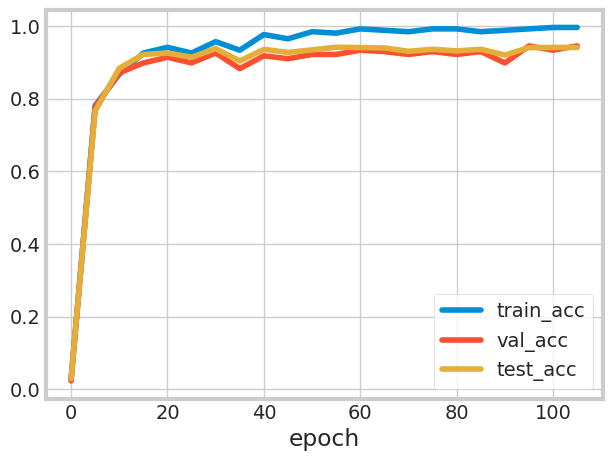

In [7]:
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);
print(f"final val acc: {df['val_acc'].iloc[-1]} best val acc: {df['val_acc'].max()}")
print(f"final test acc: {df['test_acc'].iloc[-1]} best test acc: {df['test_acc'].max()}")

In [ ]:
df = pd.read_csv(f"record_cls_eval_0_class_0.csv")
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);
print(f"final val acc: {df['val_acc'].iloc[-1]} best val acc: {df['val_acc'].max()}")
print(f"final test acc: {df['test_acc'].iloc[-1]} best test acc: {df['test_acc'].max()}")

In [ ]:
df = pd.read_csv(f"record_cls_eval_0_class_3.csv")
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);
print(f"final val acc: {df['val_acc'].iloc[-1]} best val acc: {df['val_acc'].max()}")
print(f"final test acc: {df['test_acc'].iloc[-1]} best test acc: {df['test_acc'].max()}")

In [ ]:
df = pd.read_csv(f"record_cls_eval_0_class_4.csv")
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);
print(f"final val acc: {df['val_acc'].iloc[-1]} best val acc: {df['val_acc'].max()}")
print(f"final test acc: {df['test_acc'].iloc[-1]} best test acc: {df['test_acc'].max()}")

In [ ]:
df = pd.read_csv(f"record_cls_eval_0_class_9.csv")
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);
print(f"final val acc: {df['val_acc'].iloc[-1]} best val acc: {df['val_acc'].max()}")
print(f"final test acc: {df['test_acc'].iloc[-1]} best test acc: {df['test_acc'].max()}")

In [ ]:
# calculate the per-class accuracy from the confusion matrix
def per_class_acc(conf_mat):
    return np.diag(conf_mat) / conf_mat.sum(axis=1)

def per_class_true_labels(conf_mat):
    return conf_mat.sum(axis=1)

def acc(conf_mat):
    return np.diag(conf_mat).sum() / conf_mat.sum()

In [ ]:
metric = "val"
# metric = "test"
test_before = np.load(f"two_staged_before_{metric}_conf_mat_0.npy")
test_after = np.load(f"two_staged_after_{metric}_conf_mat_0.npy")
test_after_cls0 = np.load(f"after_class_0_{metric}_conf_mat_0.npy")
test_after_cls3 = np.load(f"after_class_3_{metric}_conf_mat_0.npy")
test_after_cls4 = np.load(f"after_class_4_{metric}_conf_mat_0.npy")
test_after_cls9 = np.load(f"after_class_9_{metric}_conf_mat_0.npy")


# train_after = np.load("two_staged_after_train_conf_mat_0.npy")
# train_before = np.load("two_staged_before_train_conf_mat_0.npy")


In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_before).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_before))
print(acc(test_before));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_after))
print(acc(test_after));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after_cls0).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_after_cls0))
print(acc(test_after_cls0));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after_cls3).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_after_cls3))
print(acc(test_after_cls3));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after_cls4).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_after_cls4))
print(acc(test_after_cls4));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after_cls9).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(test_after_cls9))
print(acc(test_after_cls9));

In [ ]:
import time
import pandas as pd
from rich.logging import RichHandler
import logging
from lightning_lite.utilities.seed import seed_everything
from shell_data.dataset.dataset import get_train_val_test_subsets
import torch
import os
from shell_data.utils.config import (
    ShELLDataSharingConfig,
    DatasetConfig,
    TaskModelConfig,
    TrainingConfig,
    ExperienceReplayConfig,
    DataValuationConfig,
    RouterConfig,
    BoltzmanExplorationConfig,
)
from shell_data.utils.record import Record, snapshot_perf, snapshot_conf_mat
import numpy as np
from shell_data.shell_agent.shell_agent_classification import ShELLClassificationAgent
from itertools import combinations



os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"
torch.use_deterministic_algorithms(True)
seed_everything(0)

# logging.basicConfig(level=logging.DEBUG,
#                     format="%(message)s",
#                     handlers=[RichHandler(rich_tracebacks=True, markup=False, show_time=False, show_path=False)],)


# load the model
dataset_name = "mnist"
train_subsets, val_subsets, test_subsets = get_train_val_test_subsets(
    dataset_name)

# size = {
#     0: 512,
#     1: 256,
# }
size = 64

if isinstance(size, int):
    print("size:", size)
else:
    print("avg size: ", sum(size.values()) / len(size))

num_cls_per_task = 4
n_agents = 2
num_task_per_life = 1
buffer_integration_size = 50000  # sample all!
batch_size = 32
routing_method = "random"

cfg = ShELLDataSharingConfig(
    n_agents=n_agents,
    dataset=DatasetConfig(
        name=dataset_name,
        train_size=size,
        # should val_size be the same as train_size?
        # val_size=min(size * 3, min([len(d) for d in val_subsets])),
        val_size=size * 8,
        num_task_per_life=num_task_per_life,
        num_cls_per_task=num_cls_per_task,
    ),
    task_model=TaskModelConfig(
        name=dataset_name,
    ),
    training=TrainingConfig(
        n_epochs=200,
        batch_size=batch_size,
        patience=10,
    ),
    experience_replay=ExperienceReplayConfig(
        buffer_size=buffer_integration_size,
        # train_size=size // 2,
    ),
    data_valuation=DataValuationConfig(
        method="performance",  # control how the receiver perceives data and what to keep
    ),
    router=RouterConfig(
        strategy=routing_method,  # control how the sender decides which data point to send
        # num_batches=4,
        num_batches=1,
        # batch_size=32,  # sending half of the data
        batch_size=64 * 4,  # sending half of the data
        estimator_task_model=TaskModelConfig(
            name=dataset_name,
        ),
        explore=BoltzmanExplorationConfig(
            num_slates=64 * 4,
        ),
        n_heads=n_agents,
    ),
)

receiver = ShELLClassificationAgent(
    train_subsets, val_subsets, test_subsets, cfg)

In [ ]:
# receiver.ll_dataset.perm = torch.tensor([0, 1, 4, 9])
receiver.ll_dataset.perm = torch.tensor([0, 3, 4, 9])
receiver.init_model_router()
receiver.load_model("two_staged_receiver")

In [ ]:
receiver.ll_dataset.perm

In [ ]:
# # test receiver
test_data = receiver.ll_dataset.get_test_dataset(0, kind="one")
# X_test = [x for x, y in test_data]
# y_test = [y for x, y in test_data]
# len(X_test)

In [ ]:
val_data = receiver.ll_dataset.get_val_dataset(0, kind="one")
# X_val = [x for x, y in val_data]
# y_val = [y for x, y in val_data]
X_test = [x for x, y in val_data]
y_test = [y for x, y in val_data]
# len(X_test)
# len(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix
with torch.no_grad():
    # y_hat_val = receiver.model.net(torch.stack(X_val).to(receiver.model.device))
    y_hat_val = receiver.model.net(torch.stack(X_test).to(receiver.model.device))
    # val_conf_mat = confusion_matrix(y_val, y_hat_val.argmax(dim=1).cpu())
    val_conf_mat = confusion_matrix(y_test, y_hat_val.argmax(dim=1).cpu())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(val_conf_mat).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
print(per_class_acc(val_conf_mat))
print(acc(val_conf_mat));

In [ ]:
with torch.no_grad():
    y_hat = receiver.model.net(torch.stack(X_test).to(receiver.model.device))

In [ ]:
y_pred = y_hat.argmax(dim=1)
y_pred.shape

In [ ]:
# print("accuracy:", (y_pred == y_test).sum().item() / len(y_test))

In [ ]:
y_test = torch.stack(y_test).to(receiver.model.device)
y_test.shape

In [ ]:
correct_idx = y_pred == y_test
incorrect_idx = y_pred != y_test
correct_X = [X_test[i] for i in range(len(X_test)) if correct_idx[i]]
correct_y_label = [y_test[i] for i in range(len(y_test)) if correct_idx[i]]
incorrect_X = [X_test[i] for i in range(len(X_test)) if incorrect_idx[i]]
incorrect_y_label = [y_test[i] for i in range(len(y_test)) if incorrect_idx[i]]
incorrect_y_pred = [y_pred[i] for i in range(len(y_pred)) if incorrect_idx[i]]

In [ ]:
# sample randomly 10 correct and 10 incorrect
# plot the images, labels, and predictions
correct_X = torch.stack(correct_X)
correct_y_label = torch.stack(correct_y_label)
incorrect_X = torch.stack(incorrect_X)
incorrect_y_label = torch.stack(incorrect_y_label)
incorrect_y_pred = torch.stack(incorrect_y_pred)


some_correct_idx = random.sample(range(len(correct_X)), 10)
some_incorrect_idx = random.sample(range(len(incorrect_X)), 10)

num_samples = 8
# plot the images, labels, and predictions
fig, axes = plt.subplots(2, num_samples, figsize=(20, 5))
for i in range(num_samples):
    axes[0, i].imshow(correct_X[some_correct_idx[i]].squeeze(), cmap="gray")
    axes[0, i].set_title(f"Label: {correct_y_label[some_correct_idx[i]]}, Pred: {y_pred[some_correct_idx[i]]}")
    if len(incorrect_X) > 0:
        axes[1, i].imshow(incorrect_X[some_incorrect_idx[i]].squeeze(), cmap="gray")
        print("label:", incorrect_y_label[some_incorrect_idx[i]], "pred:", incorrect_y_pred[some_incorrect_idx[i]])
        axes[1, i].set_title(f"Label: {incorrect_y_label[some_incorrect_idx[i]]}, Pred: {incorrect_y_pred[some_incorrect_idx[i]]}")

plt.tight_layout()


In [ ]:
from sklearn.manifold import TSNE
import umap

reducer = TSNE(n_components=2, init="pca", random_state=0)
# reducer = umap.UMAP(n_neighbors=15)
X_test = torch.stack(X_test)
def to_features(X):
    return X.view(X.size(0), -1)
reducer.fit(to_features(X_test))

In [ ]:
# # visualize the decision boundary of the model
# # inverse project the tsne embedding back to the original space
# # and feed it to the model
# # plot the decision boundary

# # create a grid of points
# x_min, x_max = reducer.embedding_[:, 0].min() - 1, reducer.embedding_[:, 0].max() + 1
# y_min, y_max = reducer.embedding_[:, 1].min() - 1, reducer.embedding_[:, 1].max() + 1
# # xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# # instead of projecting the grid back to the original space (which is
# # not clear how to do), for each point of the grid, we assign
# # to the K nearest neighbors of the point in the original space
# # and get the majority vote of the predicted class
# k = 5
# # get the k nearest neighbors of each point in the grid

# grid = np.c_[xx.ravel(), yy.ravel()]
# # get the k nearest neighbors of each point in the grid

# from sklearn.neighbors import NearestNeighbors
# def get_knn(grid, k):
#     knn = NearestNeighbors(n_neighbors=k)
#     knn.fit(reducer.embedding_)
#     dist, idx = knn.kneighbors(grid)
#     return dist, idx
# dist, idx = get_knn(grid, k)

# from tqdm import tqdm

# y_pred_grid = []
# for i in tqdm(range(len(grid))):
#     # get the k nearest neighbors of the point
#     # and get the majority vote of the predicted class
#     y_pred_knn = y_pred[idx[i]]
#     y_pred_grid.append(torch.mode(y_pred_knn).values.item())

# y_pred_grid = np.array(y_pred_grid).reshape(xx.shape)

# from sklearn.inspection import DecisionBoundaryDisplay

# display = DecisionBoundaryDisplay(
#     xx0=xx, xx1=yy, response=y_pred_grid,
# )

In [ ]:
y_hat.shape

In [ ]:
# y_test = torch.stack(y_test)

In [ ]:
# convert logit y_hat to probability, and then compute the entropy
# entropy = -p * log(p)
import torch.distributions as dist


probs = torch.softmax(y_hat, dim=1)
# calculate the entropy of each row
categorical = dist.Categorical(probs=probs)
entropy = categorical.entropy()

In [ ]:
min_alpha = 0.1
max_alpha = 0.9
# normalize entropy to between min_alpha and max_alpha
alpha = (entropy - entropy.min()) / (entropy.max() - entropy.min()) * (max_alpha - min_alpha) + min_alpha
# invert the alpha
# alpha = 1 - alpha
alpha.shape, y_test.shape

In [ ]:
# # compute the centroids using kmeans from embeddings
# num_clusters = 4
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(reducer.embedding_)
# centroids = kmeans.cluster_centers_

In [ ]:


# plot the reducer tsne projection with the labels labeled and colored
fig, ax = plt.subplots(figsize=(20, 10))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
centroids = []
# scatter with labels colored by class
for i in range(10):
    idx = (y_test == i).to("cpu")
    if idx.sum() < 1:
        continue
    # separate between correct and incorrect
    correct_idx_cls = idx & (correct_idx.to("cpu"))
    incorrect_idx_cls = idx & (incorrect_idx.to("cpu"))
    # plot correct and incorrect with the same color
    # but correct has alpha=0.5, cmap from tab10
    color = colors.pop(0)
    # plot ax scatter with alphas proportional to the entropy
    # correct with X and incorrect with O

    # plot correct

    if correct_idx_cls.sum() > 0:
        ax.scatter(
            reducer.embedding_[correct_idx_cls, 0],
            reducer.embedding_[correct_idx_cls, 1],
            alpha=alpha[correct_idx_cls].cpu().numpy(),
            # alpha=0.1,
            c=color,
            marker=".",
            s=100,
            label=f"class {i}",
        )

    # plot incorrect
    if incorrect_idx_cls.sum() > 0:
        ax.scatter(
            reducer.embedding_[incorrect_idx_cls, 0],
            reducer.embedding_[incorrect_idx_cls, 1],
            alpha=alpha[incorrect_idx_cls].cpu().numpy(),
            # alpha=1.0,
            c=color,
            marker="*",
            # label=f"class {i}",
            s=200,
        )

    # compute the centroid as the average of X
    centroids.append(reducer.embedding_[correct_idx_cls, :].mean(axis=0))

centroids = np.array(centroids)
# plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="black", s=200, label="centroids")


plt.title("TSNE projection of the test set")
# plot the decision boundary with the same color as the scatter
# display.plot(ax=ax, alpha=0.5, linewidth=2)
leg = ax.legend();
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout();

In [ ]:
# get the distance from each point in reducer.embedding_ to the nearest centroid
from scipy.spatial.distance import cdist
dist = cdist(reducer.embedding_, centroids)
min_distances = dist.min(axis=1)
# normalize the min_distances to between 0 and 1
min_distances = (min_distances - min_distances.min()) / (min_distances.max() - min_distances.min())

In [ ]:
# plot min_distances and entropy
correct_dist = min_distances[correct_idx.cpu()]
incorrect_dist = min_distances[incorrect_idx.cpu()]

correct_entropy = entropy[correct_idx].cpu()
incorrect_entropy = np.array(entropy[incorrect_idx].cpu())

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(incorrect_dist.reshape(-1, 1), incorrect_entropy)
# reg = LinearRegression().fit(correct_dist.reshape(-1, 1), correct_entropy)
print("slope:", reg.coef_[0])

plt.plot(incorrect_dist, incorrect_entropy, "o")
# plt.plot(correct_dist, correct_entropy, "o")
# plot the regression line
plt.plot(incorrect_dist, reg.predict(incorrect_dist.reshape(-1, 1)), "r-")
# plt.plot(correct_dist, reg.predict(correct_dist.reshape(-1, 1)), "r-")
plt.xlabel("min distance to centroid")
plt.ylabel("entropy")

In [ ]:
plt.hist(entropy[correct_idx_cls].cpu().numpy())

In [ ]:
plt.hist(entropy[incorrect_idx_cls].cpu().numpy())

In [ ]:
# plot entropy per class
fig, ax = plt.subplots(4, figsize=(20, 20))
j = 0
for i in range(10):
    idx = (y_test == i).to("cpu")
    if idx.sum() < 1:
        continue

    
    incorrect_idx_cls = idx & (incorrect_idx.to("cpu"))
    correct_idx_cls = idx & (correct_idx.to("cpu"))
    # plot correct in blue and incorrect in red
    ax[j].hist(entropy[correct_idx_cls].cpu().numpy(), alpha=0.5, label="correct")
    ax[j].hist(entropy[incorrect_idx_cls].cpu().numpy(), alpha=0.5, label="incorrect")
    ax[j].set_title(f"class {i}")
    j += 1
leg = ax[0].legend();
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.ylabel("entropy")
plt.xlabel("count")

In [ ]:
top_k = 10
# get the top k indices of the incorrect predictions with highest entropy
top_k_idx = torch.argsort(entropy[incorrect_idx], descending=True)[:top_k]
# print the top k incorrect predictions, labels, and entropy, and plot the images
fig, ax = plt.subplots(top_k, 1, figsize=(10, 40))
for i in range(top_k):
    idx = incorrect_idx.nonzero()[top_k_idx[i]].cpu()
    ax[i].imshow(X_test[idx].squeeze(), cmap="gray")
    ax[i].set_title(f"predicted: {y_pred[idx].item()}, entropy: {entropy[idx].item():.2f}, label: {y_test[idx].item()}")

In [ ]:
# TODO: need to test the image similarity search for the top k images from the sender!

In [ ]:
# convert logit y_hat to probability, and then compute the entropy
# entropy = -p * log(p)

import torch.distributions as dist


probs = torch.softmax(y_hat, dim=1)
# calculate the entropy of each row
categorical = dist.Categorical(probs=probs)
entropy = categorical.entropy()

In [ ]:
correct_entropy = entropy[correct_idx.cpu()]
incorrect_entropy = entropy[incorrect_idx.cpu()]

In [ ]:
# find the index of the most uncertain prediction
most_uncertain_idx = torch.argsort(entropy, descending=True)[:10]
# print out the probability of the most uncertain prediction
print(probs[most_uncertain_idx])

In [ ]:
probs[most_uncertain_idx][0]

In [ ]:
# plot the distribution of entropy
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(incorrect_entropy, bins=100);

In [ ]:
# # separate correct and incorrect into 4 classes
# correct_X_0 = [x for x, y in zip(correct_X, correct_y) if y == 0]
# correct_X_1 = [x for x, y in zip(correct_X, correct_y) if y == 1]
# correct_X_4 = [x for x, y in zip(correct_X, correct_y) if y == 4]
# correct_X_9 = [x for x, y in zip(correct_X, correct_y) if y == 9]

# incorrect_X_0 = [x for x, y in zip(incorrect_X, incorrect_y) if y == 0]
# incorrect_X_1 = [x for x, y in zip(incorrect_X, incorrect_y) if y == 1]
# incorrect_X_4 = [x for x, y in zip(incorrect_X, incorrect_y) if y == 4]
# incorrect_X_9 = [x for x, y in zip(incorrect_X, incorrect_y) if y == 9]

# incorrect_pred_0 = [y_hat[i] for i in range(len(y_hat)) if incorrect_idx[i] and y_test[i] == 0]
# incorrect_pred_1 = [y_hat[i] for i in range(len(y_hat)) if incorrect_idx[i] and y_test[i] == 1]
# incorrect_pred_4 = [y_hat[i] for i in range(len(y_hat)) if incorrect_idx[i] and y_test[i] == 4]
# incorrect_pred_9 = [y_hat[i] for i in range(len(y_hat)) if incorrect_idx[i] and y_test[i] == 9]

In [ ]:
# len(incorrect_X_0), len(incorrect_X_1), len(incorrect_X_4), len(incorrect_X_9)

In [ ]:
# # draw 10 random incorrect samples from each class, plot it and label it with the incorrect prediction
# import random
# incorrect_X_0 = random.sample(incorrect_X_0, 10)
# incorrect_X_1 = random.sample(incorrect_X_1, 8)
# incorrect_X_4 = random.sample(incorrect_X_4, 10)
# incorrect_X_9 = random.sample(incorrect_X_9, 10)

# # plot 10 random incorrect samples from each class
# fig, axs = plt.subplots(4, 5, figsize=(20, 10))
# # plot 4 classes
# for i in range(4):
#     # plot 10 samples
#     num_samples = 5
#     for j in range(num_samples):
#         if i == 0:
#             axs[i, j].imshow(incorrect_X_0[j][0], cmap="gray")
#             axs[i, j].set_title("0: " + str(incorrect_pred_0[j].argmax().item()))
#         elif i == 1:
#             axs[i, j].imshow(incorrect_X_1[j][0], cmap="gray")
#             axs[i, j].set_title("1: " + str(incorrect_pred_1[j].argmax().item()))
#         elif i == 2:
#             axs[i, j].imshow(incorrect_X_4[j][0], cmap="gray")
#             axs[i, j].set_title("4: " + str(incorrect_pred_4[j].argmax().item()))
#         elif i == 3:
#             axs[i, j].imshow(incorrect_X_9[j][0], cmap="gray")
#             axs[i, j].set_title("9: " + str(incorrect_pred_9[j].argmax().item()))
#         axs[i, j].axis("off")